# General Overview - Data Storytelling and Visualization

Let's take a look at this clean dataset.

- Source: https://catalog.data.gov/dataset/2015-street-tree-census-tree-data
- Source: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

Some things to consider:

- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?
- Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
- Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tree_census_cleaned.csv', index_col=0) # import data
tree = data # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651829 entries, 0 to 683787
Data columns (total 21 columns):
tree_id       651829 non-null int64
tree_dbh      651829 non-null int64
curb_loc      651829 non-null object
health        651829 non-null object
spc_common    651829 non-null object
steward       651829 non-null object
guards        651829 non-null object
sidewalk      651829 non-null object
problems      651829 non-null object
root_stone    651829 non-null object
root_grate    651829 non-null object
root_other    651829 non-null object
trunk_wire    651829 non-null object
trnk_light    651829 non-null object
trnk_other    651829 non-null object
brch_light    651829 non-null object
brch_shoe     651829 non-null object
brch_other    651829 non-null object
borough       651829 non-null object
longitude     651829 non-null float64
latitude      651829 non-null float64
dtypes: float64(2), int64(2), object(17)
memory usage: 109.4+ MB


In [4]:
tree.head()

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude
0,180683,3,OnCurb,Fair,red maple,None,None,NoDamage,None,No,...,No,No,No,No,No,No,No,Queens,-73.844215,40.723092
1,200540,21,OnCurb,Fair,pin oak,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Queens,-73.818679,40.794111
2,204026,3,OnCurb,Good,honeylocust,1or2,None,Damage,None,No,...,No,No,No,No,No,No,No,Brooklyn,-73.936608,40.717581
3,204337,10,OnCurb,Good,honeylocust,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Brooklyn,-73.934456,40.713537
4,189565,21,OnCurb,Good,American linden,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,No,Brooklyn,-73.975979,40.666778


More information on what each column name stands for:

<table>
<tr>
<th>Column Name</th>
<th>Description</th>
<th>Data Type</th>
</tr>

<tr>
<td>tree_id</td>
<td>Unique identification number for each tree point.</td>
<td>Number</td>
</tr>

<tr>
<td>tree_dbh</td>	
<td>Diameter of the tree, measured at approximately 54" / 137cm above the ground. Data was collected for both living and dead trees; for stumps, use stump_diam</td>
<td>Number</td>
</tr>

<tr>
<td>curb_loc</td>
<td>Location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)</td>
<td>Plain Text</td>
</tr>

<tr>
<td>health</td>
<td>Indicates the user's perception of tree health.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>spc_common</td>
<td>Common name for species, e.g. "red maple"</td>
<td>Plain Text</td>
</tr>

<tr>
<td>steward</td>
<td>Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>guards</td>
<td>Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>sidewalk</td>
<td>Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>problems</td>
<td></td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_stone</td>
<td>Indicates the presence of a root problem caused by paving stones in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_grate</td>
<td>Indicates the presence of a root problem caused by metal grates in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_other</td>
<td>Indicates the presence of other root problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trunk_wire</td>
<td>Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_light</td>
<td>Indicates the presence of a trunk problem caused by lighting installed on the tree</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_other</td>
<td>Indicates the presence of other trunk problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_light</td>
<td>Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_shoe</td>
<td>Indicates the presence of a branch problem caused by sneakers in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_other</td>
<td>Indicates the presence of other branch problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>borough</td>
<td>Name of borough in which tree point is located</td>
<td>Plain Text</td>
</tr>

<tr>
<td>latitude</td>
<td>Latitude of point, in decimal degrees</td>
<td>Number</td>
</tr>

<tr>
<td>longitude</td>
<td>Longitude of point, in decimal degrees</td>
<td>Number</td>
</tr>
</table>

In [5]:
tree_health = tree.health.value_counts().reset_index() # taking a look at the overall tree health
tree_health.columns = ['Health', 'Trees']
tree_health

,Health,Trees
0,Good,528582
1,Fair,96451
2,Poor,26796


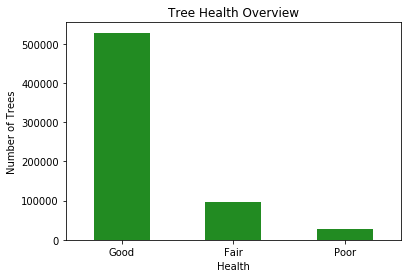

In [6]:
tree.health.value_counts().plot(kind='bar', color='forestgreen')
plt.xlabel('Health')
plt.ylabel('Number of Trees')
plt.title('Tree Health Overview')
plt.xticks(rotation=0)
plt.show()

In [7]:
tree_health_per = tree.health.value_counts(normalize=True).reset_index() # percentage
tree_health_per.columns = ['Health', 'Percentage']
tree_health_per

,Health,Percentage
0,Good,0.810921
1,Fair,0.147970
2,Poor,0.041109


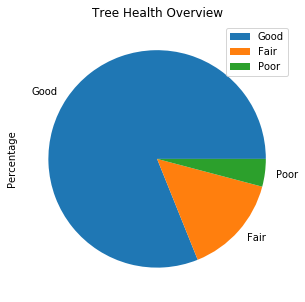

In [8]:
tree_health_per.index = ['Good', 'Fair', 'Poor']
tree_health_per.plot.pie(y='Percentage', figsize=(5, 5))
plt.title('Tree Health Overview')
plt.show()

Trees in NYC are mostly in good condition: 81.1% are in good condition, 14.8% are in fair condition, and only 4.11% are in poor condition.

## Which Boroughs Have the Healthiest / Unhealthiest Trees?

In [9]:
tree_borough = tree.borough.value_counts().reset_index() # number of trees in each borough
tree_borough.columns = ['Borough', 'Trees']
tree_borough

,Borough,Trees
0,Queens,237850
1,Brooklyn,169672
2,Staten Island,101353
3,Bronx,80548
4,Manhattan,62406


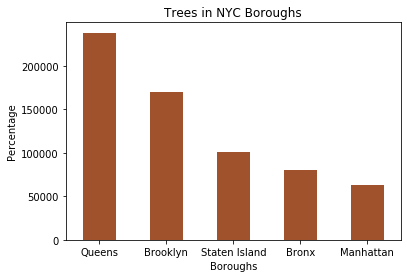

In [10]:
tree.borough.value_counts().plot(kind='bar', color='sienna')
plt.xlabel('Boroughs')
plt.ylabel('Percentage')
plt.title('Trees in NYC Boroughs')
plt.xticks(rotation=0)
plt.show()

In [11]:
tree_borough_per = tree.borough.value_counts(normalize=True).reset_index() # percentage
tree_borough_per.columns = ['Borough', 'Percentage']
tree_borough_per

,Borough,Percentage
0,Queens,0.364896
1,Brooklyn,0.260301
2,Staten Island,0.155490
3,Bronx,0.123572
4,Manhattan,0.095740


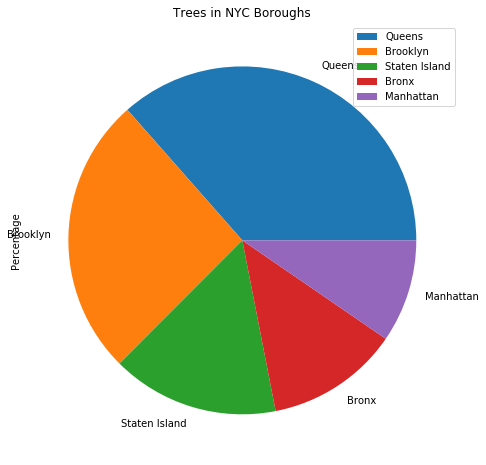

In [12]:
tree_borough_per.index = ['Queens', 'Brooklyn', 'Staten Island', 'Bronx', 'Manhattan']
tree_borough_per.plot.pie(y='Percentage', figsize=(8, 8))
plt.title('Trees in NYC Boroughs')
plt.show()

The majority of trees are in Queens (36.49%), followed by Brooklyn (26.03%), Staten Island (15.55%), the Bronx (12.36%), and Manhattan (9.57%).

In [13]:
# plotting the categorical data

# plt.figure(figsize=(25,5))

# plt.subplot(151)
# plt.title('Queens')
# tree[tree.borough == 'Queens']['health'].value_counts().plot(kind='bar')
# plt.ylabel('Percentage of Trees')
# plt.xticks(rotation=0)
# plt.subplot(152)
# plt.title('Brooklyn')
# tree[tree.borough == 'Brooklyn']['health'].value_counts().plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(153)
# plt.title('Staten Island')
# tree[tree.borough == 'Staten Island']['health'].value_counts().plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(154)
# plt.title('The Bronx')
# tree[tree.borough == 'Bronx']['health'].value_counts().plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(155)
# plt.title('Manhattan')
# tree[tree.borough == 'Manhattan']['health'].value_counts().plot(kind='bar')
# plt.xticks(rotation=0)

# plt.show()

In [14]:
tree.groupby('borough')['health'].value_counts()

borough        health
Bronx          Good       66572
               Fair       10882
               Poor        3094
Brooklyn       Good      138154
               Fair       25062
               Poor        6456
Manhattan      Good       47343
               Fair       11456
               Poor        3607
Queens         Good      193919
               Fair       34524
               Poor        9407
Staten Island  Good       82594
               Fair       14527
               Poor        4232
Name: health, dtype: int64

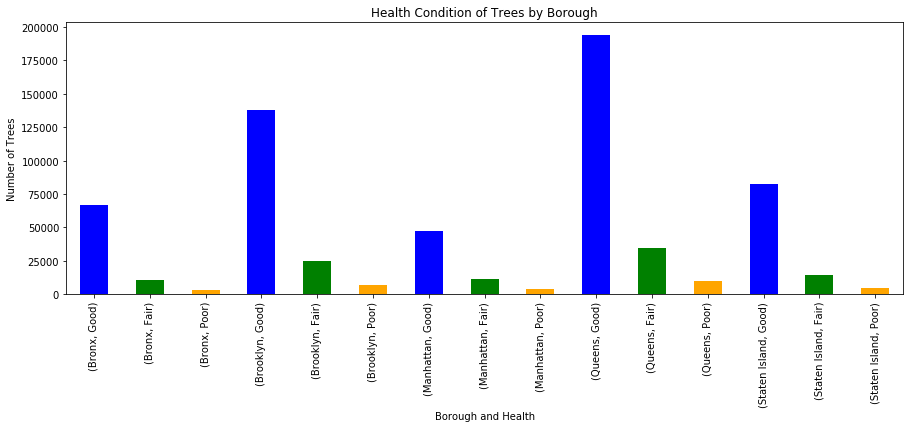

In [15]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Borough and Health')
plt.ylabel('Number of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

In [16]:
tree.groupby('borough')['health'].value_counts(normalize=True)

borough        health
Bronx          Good      0.826489
               Fair      0.135100
               Poor      0.038412
Brooklyn       Good      0.814242
               Fair      0.147709
               Poor      0.038050
Manhattan      Good      0.758629
               Fair      0.183572
               Poor      0.057799
Queens         Good      0.815300
               Fair      0.145150
               Poor      0.039550
Staten Island  Good      0.814914
               Fair      0.143331
               Poor      0.041755
Name: health, dtype: float64

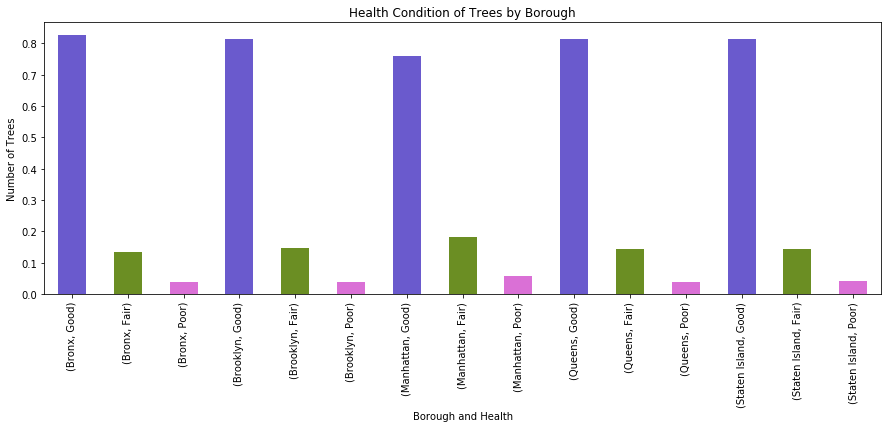

In [17]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts(normalize=True).plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.xlabel('Borough and Health')
plt.ylabel('Number of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

The Bronx has the highest percentage of good trees (82.65%). Manhattan has the highest percentage of fair (18.36%) and poor (5.78%) trees out of all five boroughs.

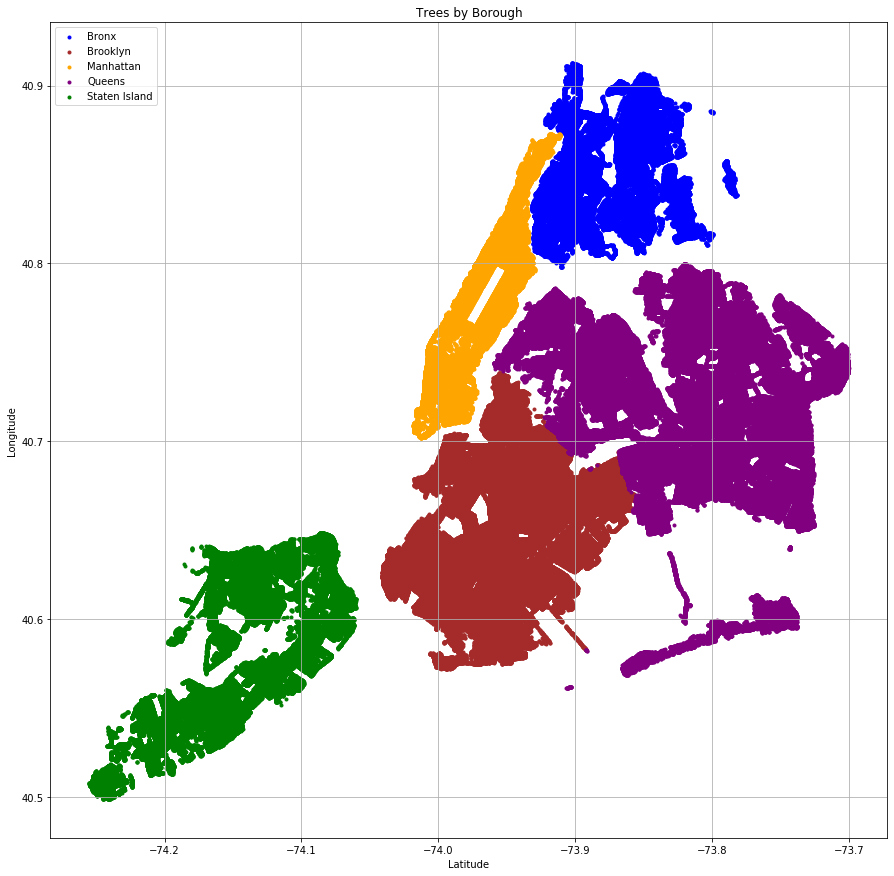

In [18]:
# plotting trees on a map

trees_bronx_scat = tree[tree.borough == 'Bronx']
trees_brooklyn_scat = tree[tree.borough == 'Brooklyn']
trees_manhattan_scat = tree[tree.borough == 'Manhattan']
trees_queens_scat = tree[tree.borough == 'Queens']
trees_staten_scat = tree[tree.borough == 'Staten Island']

plt.figure(figsize=(15, 15))
plt.scatter(trees_bronx_scat.longitude, trees_bronx_scat.latitude, c='blue', label='Bronx', marker='.')
plt.scatter(trees_brooklyn_scat.longitude, trees_brooklyn_scat.latitude, c='brown', label='Brooklyn', marker='.')
plt.scatter(trees_manhattan_scat.longitude, trees_manhattan_scat.latitude, c='orange', label='Manhattan', marker='.')
plt.scatter(trees_queens_scat.longitude, trees_queens_scat.latitude, c='purple', label='Queens', marker='.')
plt.scatter(trees_staten_scat.longitude, trees_staten_scat.latitude, c='green', label='Staten Island', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees by Borough')
plt.grid()
plt.legend(loc='upper left')
plt.show()

### Bronx

/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


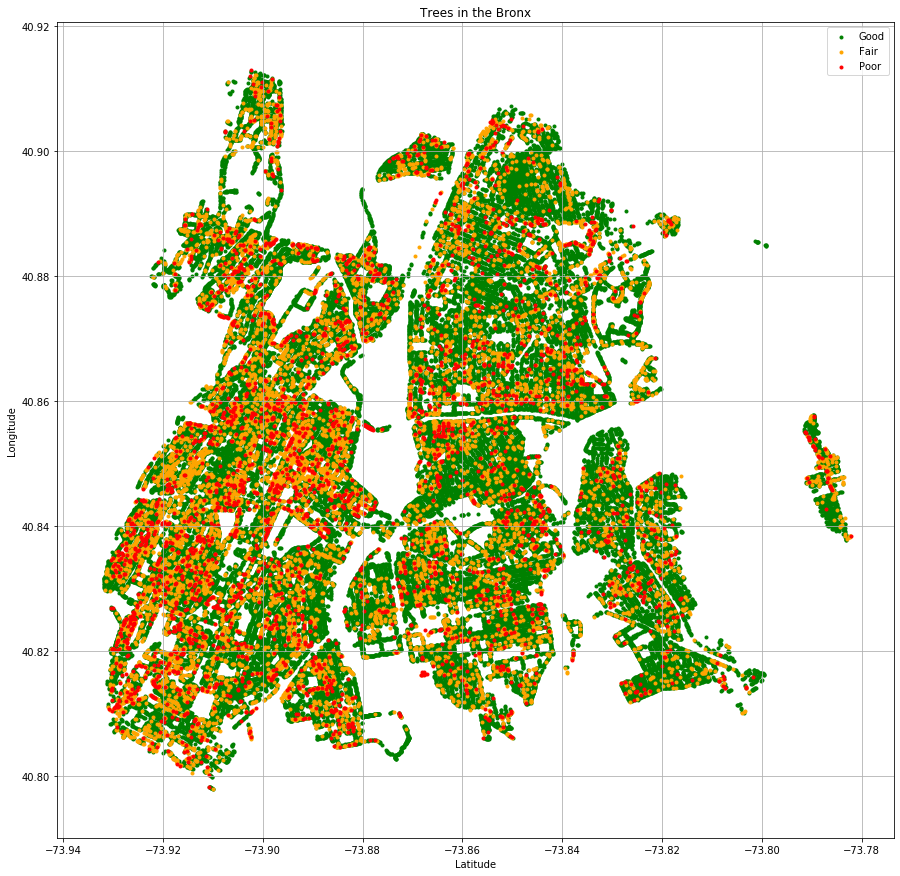

In [19]:
bronx_good = trees_bronx_scat[tree.health == 'Good']
bronx_fair = trees_bronx_scat[tree.health == 'Fair']
bronx_poor = trees_bronx_scat[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(bronx_good.longitude, bronx_good.latitude, c='green', label='Good', marker='.')
plt.scatter(bronx_fair.longitude, bronx_fair.latitude, c='orange', label='Fair', marker='.')
plt.scatter(bronx_poor.longitude, bronx_poor.latitude, c='red', label='Poor', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in the Bronx')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Brookyln

/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


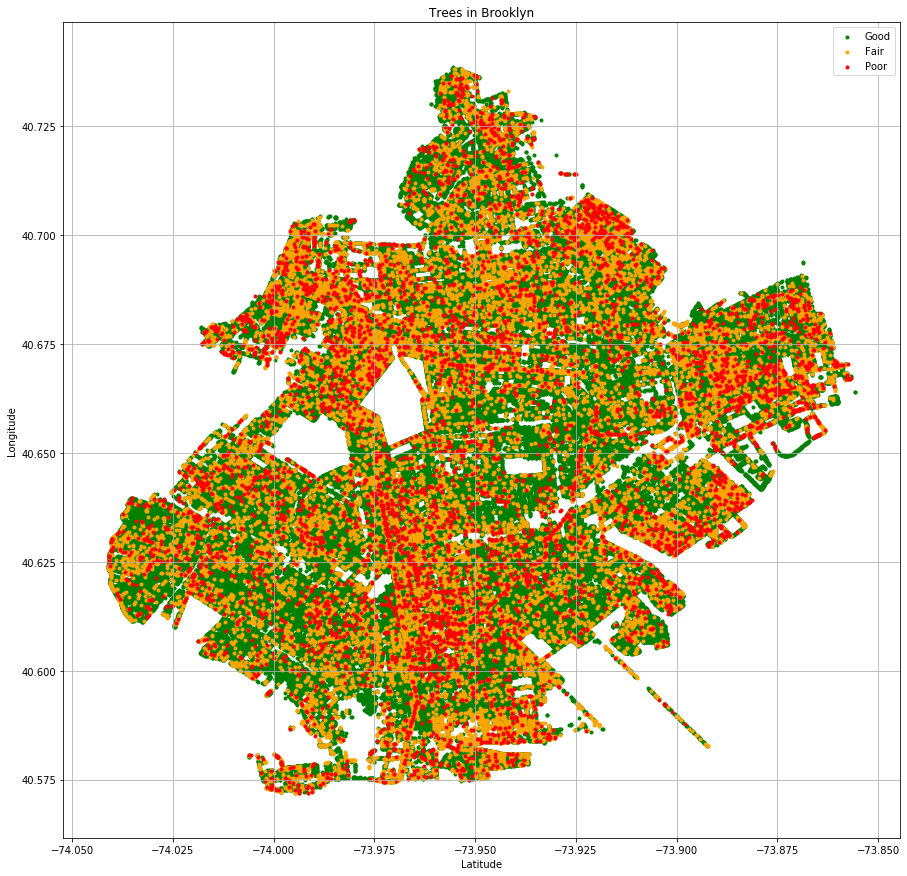

In [20]:
brooklyn_good = trees_brooklyn_scat[tree.health == 'Good']
brooklyn_fair = trees_brooklyn_scat[tree.health == 'Fair']
brooklyn_poor = trees_brooklyn_scat[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(brooklyn_good.longitude, brooklyn_good.latitude, c='green', label='Good', marker='.')
plt.scatter(brooklyn_fair.longitude, brooklyn_fair.latitude, c='orange', label='Fair', marker='.')
plt.scatter(brooklyn_poor.longitude, brooklyn_poor.latitude, c='red', label='Poor', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Brooklyn')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Manhattan

/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


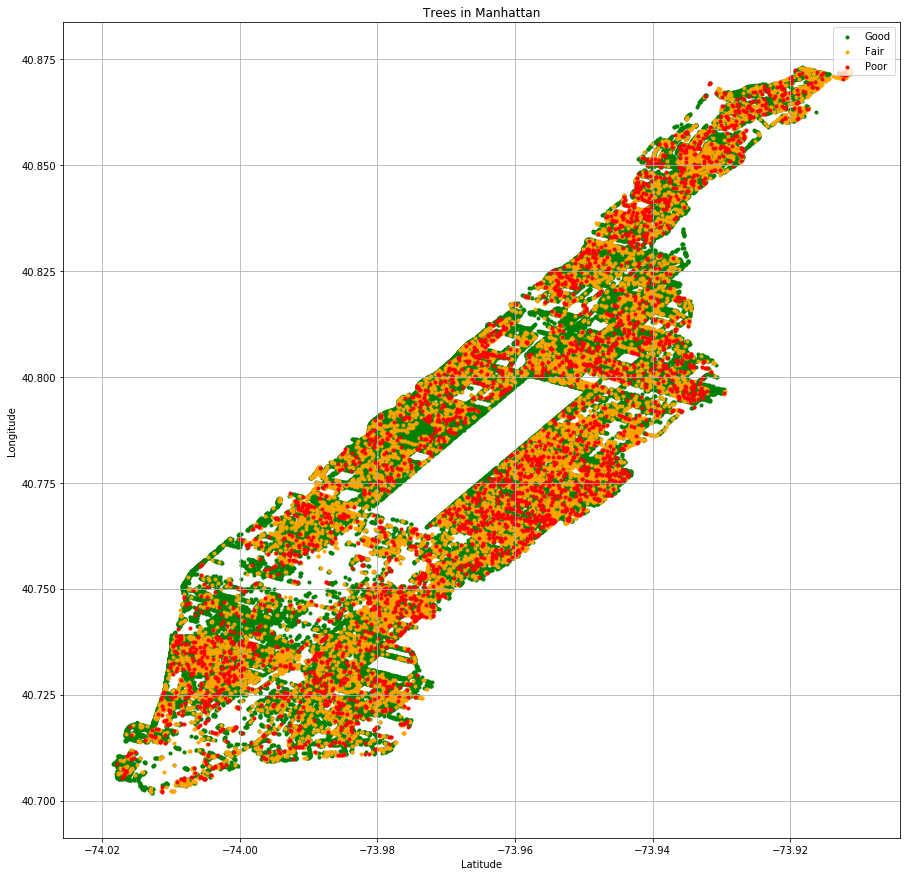

In [21]:
manhattan_good = trees_manhattan_scat[tree.health == 'Good']
manhattan_fair = trees_manhattan_scat[tree.health == 'Fair']
manhattan_poor = trees_manhattan_scat[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(manhattan_good.longitude, manhattan_good.latitude, c='green', label='Good', marker='.')
plt.scatter(manhattan_fair.longitude, manhattan_fair.latitude, c='orange', label='Fair', marker='.')
plt.scatter(manhattan_poor.longitude, manhattan_poor.latitude, c='red', label='Poor', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Manhattan')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Queens

/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


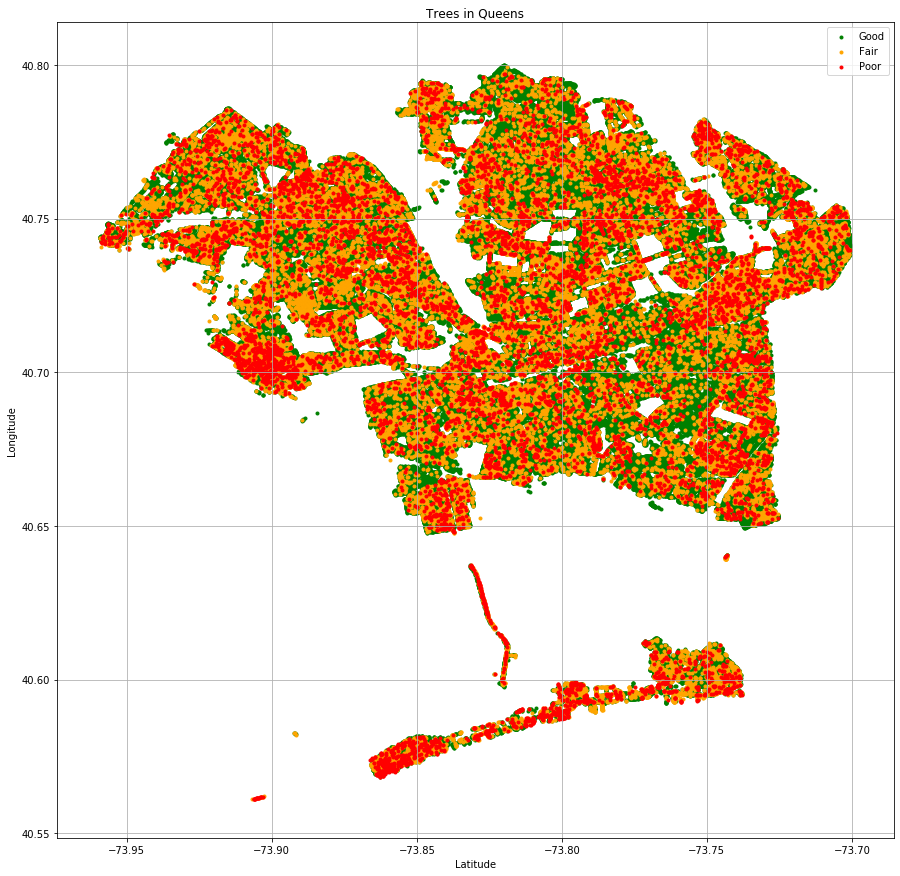

In [22]:
queens_good = trees_queens_scat[tree.health == 'Good']
queens_fair = trees_queens_scat[tree.health == 'Fair']
queens_poor = trees_queens_scat[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(queens_good.longitude, queens_good.latitude, c='green', label='Good', marker='.')
plt.scatter(queens_fair.longitude, queens_fair.latitude, c='orange', label='Fair', marker='.')
plt.scatter(queens_poor.longitude, queens_poor.latitude, c='red', label='Poor', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Queens')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Staten Island

/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/annatang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


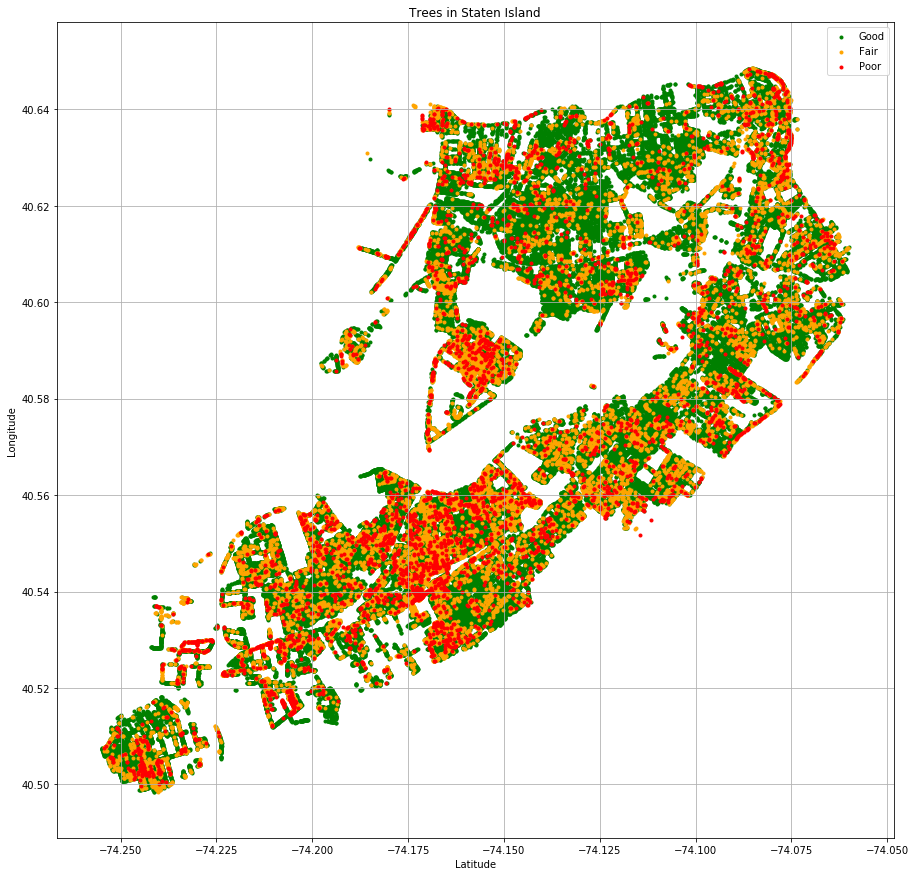

In [23]:
staten_good = trees_staten_scat[tree.health == 'Good']
staten_fair = trees_staten_scat[tree.health == 'Fair']
staten_poor = trees_staten_scat[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(staten_good.longitude, staten_good.latitude, c='green', label='Good', marker='.')
plt.scatter(staten_fair.longitude, staten_fair.latitude, c='orange', label='Fair', marker='.')
plt.scatter(staten_poor.longitude, staten_poor.latitude, c='red', label='Poor', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Staten Island')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Stewardships and Tree Health

The Parks & Rec website define 'steward' as 'the number of unique signs of stewardship observed for this tree.'

In [24]:
tree_steward = tree.steward.value_counts().reset_index() # stewards per tree
tree_steward.columns = ['Stewards', 'Trees']
tree_steward

,Stewards,Trees
0,None,487624
1,1or2,143424
2,3or4,19172
3,4orMore,1609


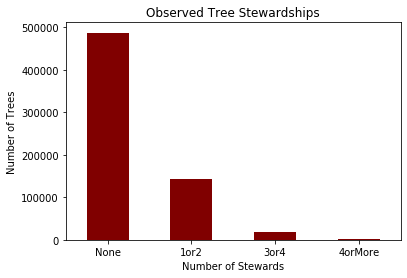

In [25]:
# visualizing stewardship

tree.steward.value_counts().plot(kind='bar', color='maroon')
plt.xticks(rotation=0)
plt.xlabel('Number of Stewards')
plt.ylabel('Number of Trees')
plt.title('Observed Tree Stewardships')
plt.show()

In [26]:
tree_steward_per = tree.steward.value_counts(normalize=True).reset_index() # percentage
tree_steward_per.columns = ['Steward', 'Percentage']
tree_steward_per

,Steward,Percentage
0,None,0.748086
1,1or2,0.220033
2,3or4,0.029413
3,4orMore,0.002468


The majority of trees (74.81%) do not have a steward.

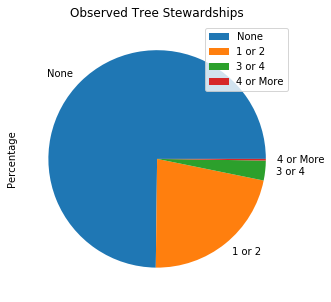

In [27]:
# visualizing stewardship

tree_steward_per.index = ['None', '1 or 2', '3 or 4', '4 or More']
tree_steward_per.plot.pie(y='Percentage', figsize=(5, 5))
plt.title('Observed Tree Stewardships')
plt.show()

In [28]:
# plot the representation

# plt.figure(figsize=(20,5))

# plt.subplot(141)
# plt.title('No Stewards')
# tree[tree.steward == 'None']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(142)
# plt.title('1 or 2 Stewards')
# tree[tree.steward == '1or2']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(143)
# plt.title('3 or 4 Stewards')
# tree[tree.steward == '3or4']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(144)
# plt.title('4 or More Stewards')
# tree[tree.steward == '4orMore']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)

# plt.show()

In [29]:
tree.groupby('steward')['health'].value_counts()

steward  health
1or2     Good      115261
         Fair       21885
         Poor        6278
3or4     Good       15596
         Fair        2829
         Poor         747
4orMore  Good        1360
         Fair         200
         Poor          49
None     Good      396365
         Fair       71537
         Poor       19722
Name: health, dtype: int64

In [30]:
tree.groupby('steward')['health'].value_counts(normalize=True)

steward  health
1or2     Good      0.803638
         Fair      0.152590
         Poor      0.043772
3or4     Good      0.813478
         Fair      0.147559
         Poor      0.038963
4orMore  Good      0.845245
         Fair      0.124301
         Poor      0.030454
None     Good      0.812850
         Fair      0.146705
         Poor      0.040445
Name: health, dtype: float64

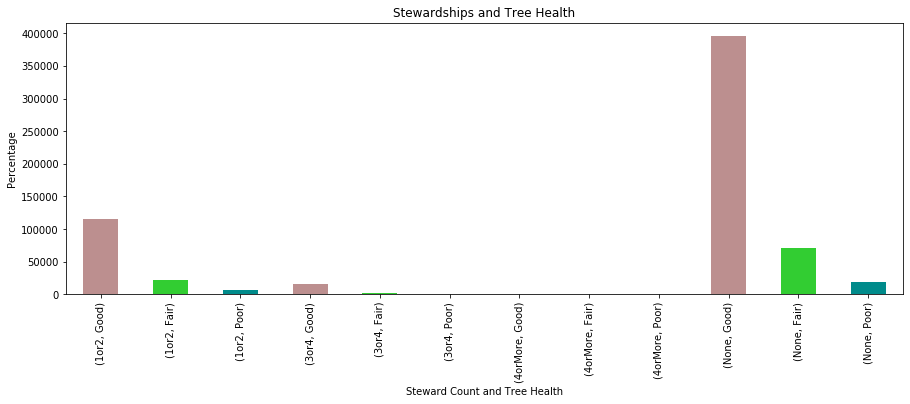

In [31]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts().plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

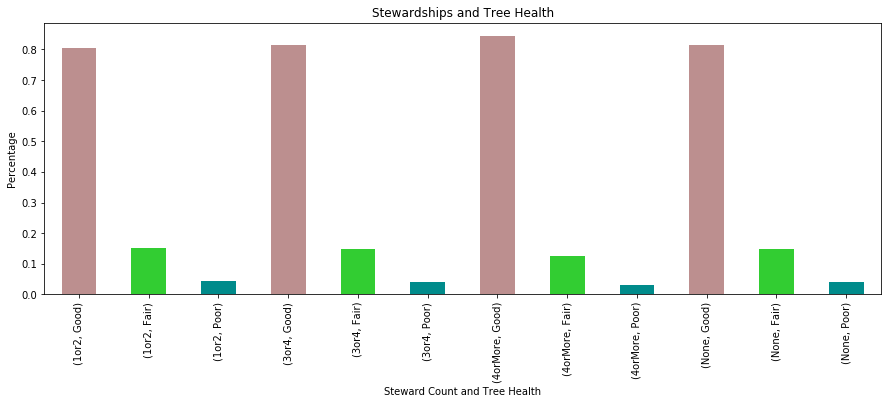

In [32]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts(normalize=True).plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

Of the trees that have stewards, those with 4 or more stewards have the highest percentage of trees in good health (84.52%) and the lowest percentage of trees in poor health (3.04%). However, it is worth nothing that trees with 4 or more stewards make up just 0.25% of the overall population.

Trees without a steward and those with 3 or 4 stewards have similar percentages of good trees, 81.29% and 81.35% respectively. Interestingly, trees with 1 or 2 stewards have the highest number of fair trees (15.26%) and poor trees (4.38%).

## How Do Guards Affect the Health of a Tree?

The Parks & Rec site describes 'guards' as "whether a guard is present, and if the user felt it was a helpful or harmful guard."

In [33]:
tree_guards = tree.guards.value_counts().reset_index()
tree_guards.columns = ['Guards', 'Trees']
tree_guards

,Guards,Trees
0,None,572012
1,Helpful,51830
2,Harmful,20242
3,Unsure,7745


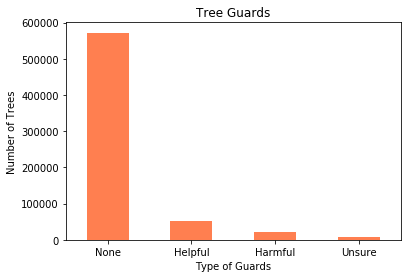

In [34]:
tree.guards.value_counts().plot(kind='bar', color='coral')
plt.xticks(rotation=0)
plt.xlabel('Type of Guards')
plt.ylabel('Number of Trees')
plt.title('Tree Guards')
plt.show()

In [35]:
tree_guards_per = tree.guards.value_counts(normalize=True).reset_index()
tree_guards_per.columns = ['Guards', 'Percentage']
tree_guards_per

,Guards,Percentage
0,None,0.877549
1,Helpful,0.079515
2,Harmful,0.031054
3,Unsure,0.011882


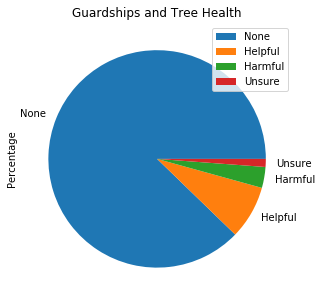

In [36]:
tree_guards_per.index = ['None', 'Helpful', 'Harmful', 'Unsure']
tree_guards_per.plot.pie(y='Percentage', figsize=(5, 5))
plt.title('Guardships and Tree Health')
plt.show()

In [37]:
# tree.guards.value_counts(normalize=True).plot(kind='bar', color='purple')
# plt.xlabel('Guard Levels')
# plt.ylabel('Percentage')
# plt.title('Presence of Guards on Tree Health')
# plt.xticks(rotation=0)
# plt.show()

In [38]:
# plt.figure(figsize=(20, 5))

# plt.subplot(1,4,1)
# plt.title('No Guards')
# tree[tree.guards == 'None']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(1,4,2)
# plt.title('Helpful Guards')
# tree[tree.guards == 'Helpful']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(1,4,3)
# plt.title('Harmful Guards')
# tree[tree.guards == 'Harmful']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(1,4,4)
# plt.title('Unsure Guards')
# tree[tree.guards == 'Unsure']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)

# plt.show()

In [39]:
tree.groupby('guards')['health'].value_counts()

guards   health
Harmful  Good       15315
         Fair        3836
         Poor        1091
Helpful  Good       42610
         Fair        7159
         Poor        2061
None     Good      464747
         Fair       84081
         Poor       23184
Unsure   Good        5910
         Fair        1375
         Poor         460
Name: health, dtype: int64

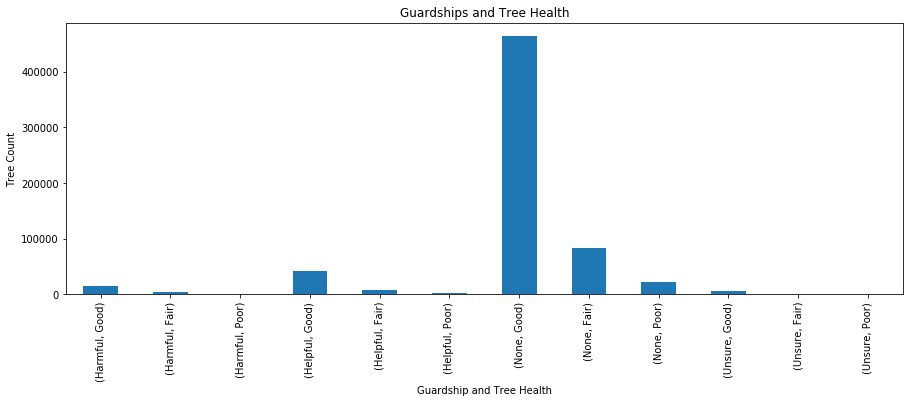

In [40]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts().plot(kind='bar')
plt.xlabel('Guardship and Tree Health')
plt.ylabel('Tree Count')
plt.title('Guardships and Tree Health')
plt.show()

In [41]:
tree.groupby('guards')['health'].value_counts(normalize=True)

guards   health
Harmful  Good      0.756595
         Fair      0.189507
         Poor      0.053898
Helpful  Good      0.822111
         Fair      0.138125
         Poor      0.039765
None     Good      0.812478
         Fair      0.146992
         Poor      0.040531
Unsure   Good      0.763073
         Fair      0.177534
         Poor      0.059393
Name: health, dtype: float64

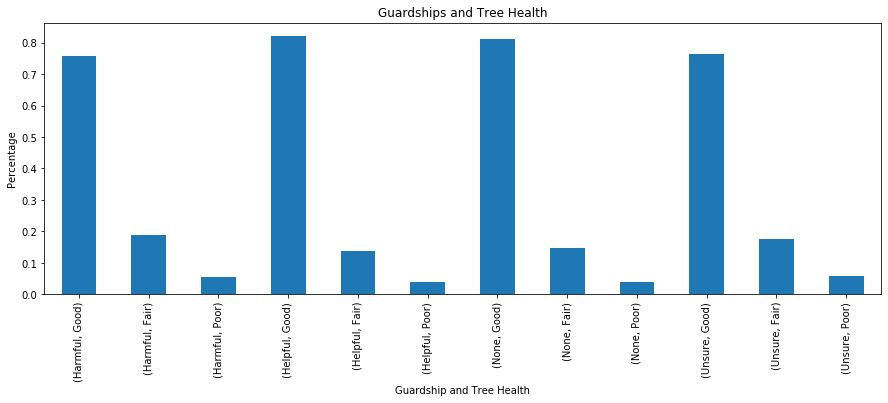

In [42]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Guardship and Tree Health')
plt.ylabel('Percentage')
plt.title('Guardships and Tree Health')
plt.show()

The majority of trees (87.76%) of trees do not have a guard. Based on viewer perceptions, those with a harmful guard have the lowest number of good trees (75.66%) and the highest number of fair trees (18.95%). Those with unsure guards have the highest number of poor trees (6.94%) while trees with helpful guards have the highest percentage of good trees (82.21%).

## Do Sidewalks Impact a Tree’s Health?

The Parks & Rec site describes 'sidewalk' as "whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted."

In [43]:
tree_sidewalk = tree.sidewalk.value_counts().reset_index()
tree_sidewalk.columns = ['Sidewalk', 'Count']
tree_sidewalk

,Sidewalk,Count
0,NoDamage,464699
1,Damage,187130


In [44]:
tree_sidewalk_per = tree.sidewalk.value_counts(normalize=True).reset_index()
tree_sidewalk_per.columns = ['Sidewalk', 'Percentage']
tree_sidewalk_per

,Sidewalk,Percentage
0,NoDamage,0.712916
1,Damage,0.287084


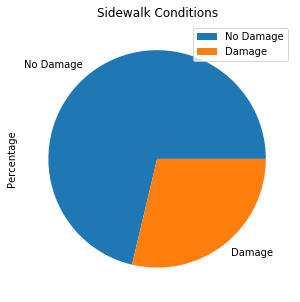

In [45]:
tree_sidewalk_per.index = ['No Damage', 'Damage']
tree_sidewalk_per.plot.pie(y='Percentage', figsize=(5, 5))
plt.title('Sidewalk Conditions')
plt.show()

In [46]:
# plt.figure(figsize=(15, 5))

# plt.subplot(121)
# plt.title('No Damage on Sidewalks')
# tree[tree.sidewalk == 'NoDamage']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(122)
# plt.title('Damaged Sidewalks')
# tree[tree.sidewalk == 'Damage']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)

# plt.show()

In [47]:
tree.groupby('sidewalk')['health'].value_counts()

sidewalk  health
Damage    Good      151844
          Fair       28688
          Poor        6598
NoDamage  Good      376738
          Fair       67763
          Poor       20198
Name: health, dtype: int64

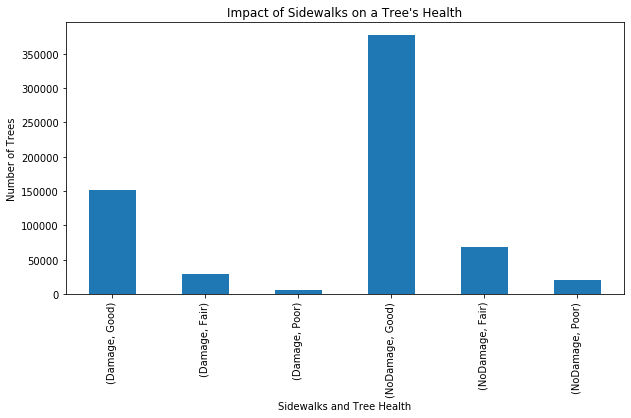

In [48]:
plt.figure(figsize=(10, 5))
tree.groupby('sidewalk')['health'].value_counts().plot(kind='bar')
plt.xlabel('Sidewalks and Tree Health')
plt.ylabel('Number of Trees')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

In [49]:
tree.groupby('sidewalk')['health'].value_counts(normalize=True)

sidewalk  health
Damage    Good      0.811436
          Fair      0.153305
          Poor      0.035259
NoDamage  Good      0.810714
          Fair      0.145821
          Poor      0.043465
Name: health, dtype: float64

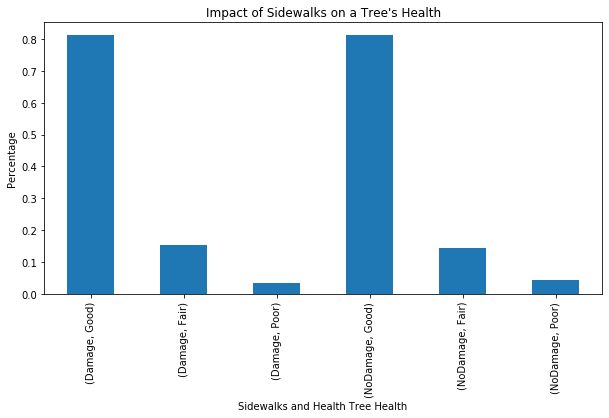

In [50]:
plt.figure(figsize=(10, 5))
tree.groupby('sidewalk')['health'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Sidewalks and Health Tree Health')
plt.ylabel('Percentage')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

The distribution of good, fair, and poor trees is similar between sidewalks with and without damage.

## Are Trees on the Curb Healthier Than Those off the Curb?

The Parks & Rec describes this as the "location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)."

In [51]:
tree_curbs = tree.curb_loc.value_counts().reset_index()
tree_curbs.columns = ['Curb', 'Count']
tree_curbs

,Curb,Count
0,OnCurb,625973
1,OffsetFromCurb,25856


In [52]:
tree_curbs_per = tree.curb_loc.value_counts(normalize=True).reset_index()
tree_curbs_per.columns = ['Curb', 'Percentage']
tree_curbs_per

,Curb,Percentage
0,OnCurb,0.960333
1,OffsetFromCurb,0.039667


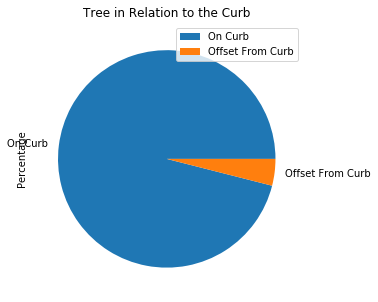

In [53]:
tree_curbs_per.index = ['On Curb', 'Offset From Curb']
tree_curbs_per.plot.pie(y='Percentage', figsize=(5, 5))
plt.title('Tree in Relation to the Curb')
plt.show()

In [54]:
# plt.figure(figsize=(15, 5))

# plt.subplot(121)
# plt.title('Tree Health on the Curb')
# tree[tree.curb_loc == 'OnCurb']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)
# plt.subplot(122)
# plt.title('Tree Health off the Curb')
# tree[tree.curb_loc == 'OffsetFromCurb']['health'].value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=0)

# plt.show()

In [55]:
tree.groupby('curb_loc')['health'].value_counts()

curb_loc        health
OffsetFromCurb  Good       20863
                Fair        4030
                Poor         963
OnCurb          Good      507719
                Fair       92421
                Poor       25833
Name: health, dtype: int64

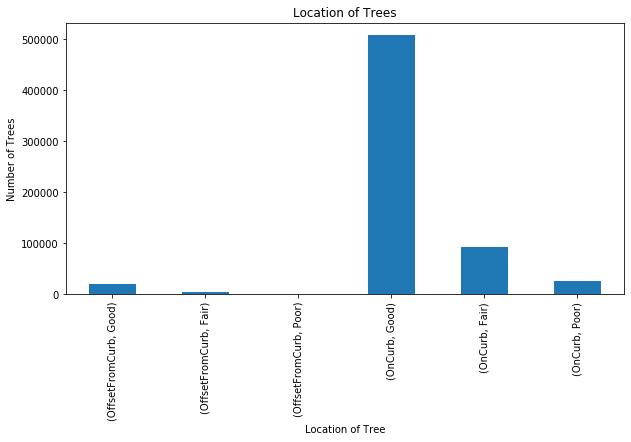

In [56]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts().plot(kind='bar')
plt.xlabel('Location of Tree')
plt.ylabel('Number of Trees')
plt.title('Location of Trees')
plt.show()


In [57]:
tree.groupby('curb_loc')['health'].value_counts(normalize=True)

curb_loc        health
OffsetFromCurb  Good      0.806892
                Fair      0.155863
                Poor      0.037245
OnCurb          Good      0.811088
                Fair      0.147644
                Poor      0.041269
Name: health, dtype: float64

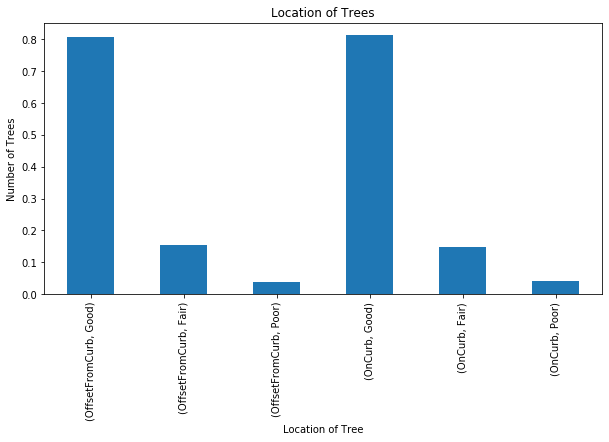

In [58]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Location of Tree')
plt.ylabel('Number of Trees')
plt.title('Location of Trees')
plt.show()

The proportion of good trees on the curb is slightly greater than trees that are offset from the curb. The difference is marginal. Interesingly, there are more poor trees on the curb in proportion to offset from the curb.

## Is the Diameter of Healthy Trees Bigger or Smaller Than Unhealthy Trees?

In [59]:
tree[['health', 'tree_dbh']].groupby('health', as_index=False).mean()

,health,tree_dbh
0,Fair,10.966263
1,Good,11.965186
2,Poor,9.016644


The healthiest trees, labeled 'good', have the largest diameters while the 'poor' trees have the smallest diameters, on average.

In [60]:
# for good measure, let's see if the same is true if we take the median instead of the mean

tree[['health', 'tree_dbh']].groupby('health', as_index=False).median()

,health,tree_dbh
0,Fair,9
1,Good,10
2,Poor,7


In [61]:
# distribution of good trees

good_dia = tree[tree.health == 'Good']['tree_dbh']
good_dia.describe()

count    528582.000000
mean         11.965186
std           8.600715
min           1.000000
25%           5.000000
50%          10.000000
75%          17.000000
max         100.000000
Name: tree_dbh, dtype: float64

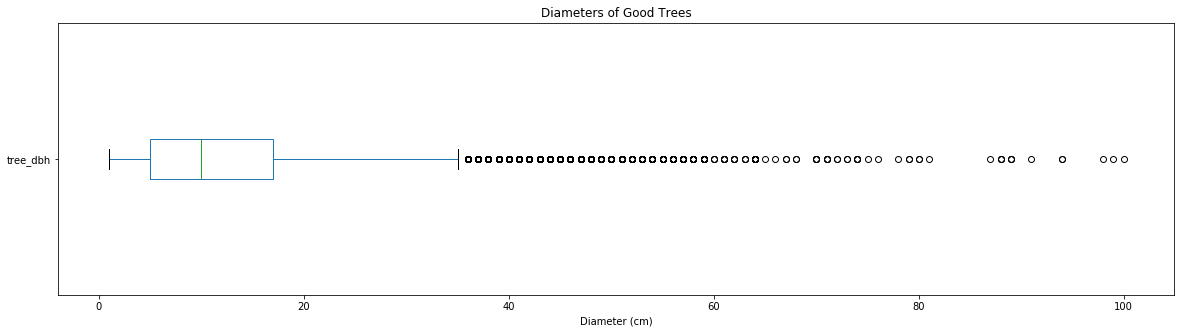

In [62]:
good_dia.plot(kind='box', vert=False, figsize=(20, 5))
plt.xlabel('Diameter (cm)')
plt.title('Diameters of Good Trees')
plt.show()

In [63]:
# distribution of fair trees

fair_dia = tree[tree.health == 'Fair']['tree_dbh']
fair_dia.describe()

count    96451.000000
mean        10.966263
std          7.654882
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         80.000000
Name: tree_dbh, dtype: float64

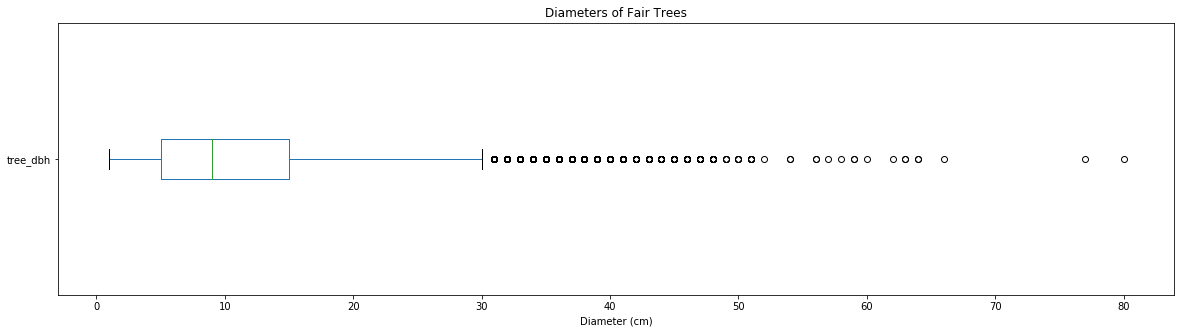

In [64]:
fair_dia.plot(kind='box', vert=False, figsize=(20, 5))
plt.xlabel('Diameter (cm)')
plt.title('Diameters of Fair Trees')
plt.show()

In [65]:
# distribution of poor trees

poor_dia = tree[tree.health == 'Poor']['tree_dbh']
poor_dia.describe()

count    26796.000000
mean         9.016644
std          6.882146
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         99.000000
Name: tree_dbh, dtype: float64

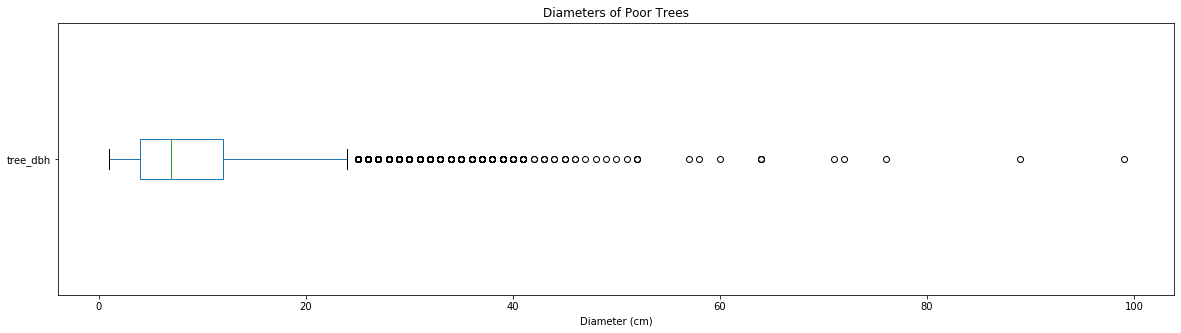

In [66]:
poor_dia.plot(kind='box', vert=False, figsize=(20, 5))
plt.xlabel('Diameter (cm)')
plt.title('Diameters of Poor Trees')
plt.show()

## What Kinds of Trees Are Grown in the City?

In [67]:
tree.spc_common.unique() # take a look at all the different trees grown in NYC

array(['red maple', 'pin oak', 'honeylocust', 'American linden',
       'London planetree', 'ginkgo', 'willow oak', 'sycamore maple',
       'Amur maple', 'hedge maple', 'American elm', 'ash', 'crab apple',
       'silver maple', 'Turkish hazelnut', 'black cherry',
       'eastern redcedar', 'Norway maple', 'tulip-poplar', 'sawtooth oak',
       'swamp white oak', 'Sophora', 'Chinese fringetree',
       'southern magnolia', 'sweetgum', 'Callery pear', 'scarlet oak',
       'Atlantic white cedar', 'black oak', 'Japanese zelkova',
       'white oak', 'Ohio buckeye', 'northern red oak', 'silver linden',
       'pignut hickory', 'Kentucky yellowwood', 'mulberry', 'Douglas-fir',
       'crepe myrtle', 'sassafras', 'cherry', 'spruce', 'Chinese elm',
       'horse chestnut', 'holly', 'littleleaf linden', 'white pine',
       'blackgum', 'Japanese tree lilac', 'hardy rubber tree',
       'green ash', 'English oak', 'white ash', 'golden raintree',
       "Schumard's oak", 'Siberian elm', 'black

In [68]:
tree.spc_common.nunique() # number of unique trees

132

There are 132 different types of trees grown in NYC. Let's see which ones are the most popular.

In [69]:
tree.spc_common.value_counts().head(20) # show top 20

# include the rest of the trees as a separate entity, create a new object

London planetree     86997
honeylocust          64246
Callery pear         58898
pin oak              53167
Norway maple         34179
littleleaf linden    29733
Japanese zelkova     29251
cherry               29248
ginkgo               21012
Sophora              19332
red maple            17244
green ash            16245
American linden      13529
silver maple         12268
sweetgum             10653
northern red oak      8396
silver linden         7994
American elm          7971
maple                 7068
purple-leaf plum      6873
Name: spc_common, dtype: int64

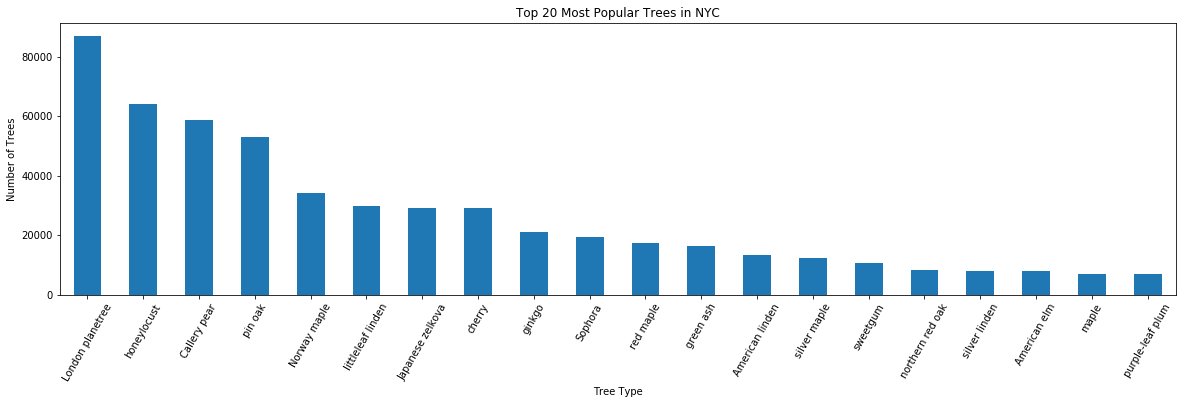

In [70]:
plt.figure(figsize=(20, 5))

tree.spc_common.value_counts().head(20).plot(kind='bar', title='Top 20 Most Popular Trees in NYC')
plt.xticks(rotation=60)
plt.xlabel('Tree Type')
plt.ylabel('Number of Trees')
plt.show()

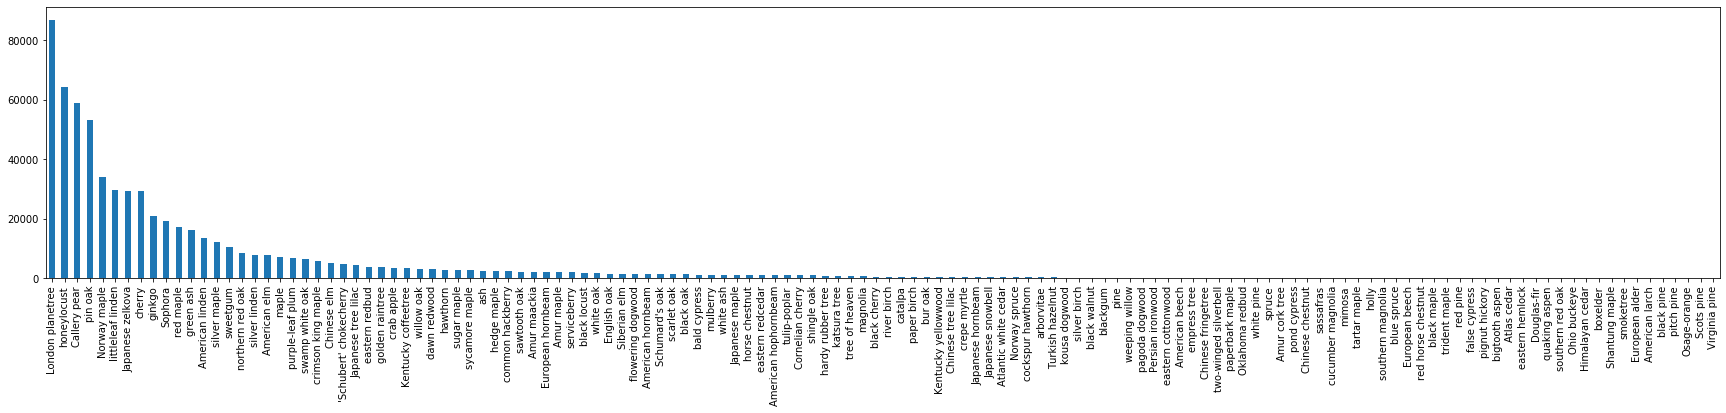

In [71]:
tree.spc_common.value_counts().plot(kind='bar', figsize=(30, 5))
plt.show()

## What Are the Most Popular Trees Grown in Each Borough?

### Bronx

In [72]:
tree_type_bronx = tree[tree.borough == 'Bronx']['spc_common'].value_counts().head(20).reset_index()
tree_type_bronx.columns = ['Tree', 'Count']
tree_type_bronx

,Tree,Count
0,honeylocust,9688
1,London planetree,7509
2,pin oak,6444
3,Callery pear,4945
4,Japanese zelkova,4637
5,cherry,4086
6,littleleaf linden,3916
7,Norway maple,3374
8,ginkgo,2683
9,Sophora,2555


### Brooklyn

In [73]:
tree_type_brooklyn = tree[tree.borough == 'Brooklyn']['spc_common'].value_counts().head(20).reset_index()
tree_type_brooklyn.columns = ['Tree', 'Count']
tree_type_brooklyn

,Tree,Count
0,London planetree,34878
1,honeylocust,16919
2,pin oak,12341
3,Japanese zelkova,9656
4,Callery pear,9077
5,littleleaf linden,8898
6,Norway maple,6988
7,Sophora,5987
8,cherry,5700
9,ginkgo,5589


### Manhattan

In [74]:
tree_type_manhattan = tree[tree.borough == 'Manhattan']['spc_common'].value_counts().head(20).reset_index()
tree_type_manhattan.columns = ['Tree', 'Count']
tree_type_manhattan

,Tree,Count
0,honeylocust,13168
1,Callery pear,7296
2,ginkgo,5859
3,pin oak,4583
4,Sophora,4453
5,London planetree,4122
6,Japanese zelkova,3596
7,littleleaf linden,3331
8,American elm,1698
9,American linden,1583


### Queens

In [75]:
tree_type_queens = tree[tree.borough == 'Queens']['spc_common'].value_counts().head(20).reset_index()
tree_type_queens.columns = ['Tree', 'Count']
tree_type_queens

,Tree,Count
0,London planetree,31109
1,pin oak,22597
2,honeylocust,20286
3,Norway maple,19402
4,Callery pear,16541
5,cherry,13486
6,littleleaf linden,11901
7,Japanese zelkova,8984
8,green ash,7388
9,silver maple,6114


### Staten Island

In [76]:
tree_type_staten = tree[tree.borough == 'Staten Island']['spc_common'].value_counts().head(20).reset_index()
tree_type_staten.columns = ['Tree', 'Count']
tree_type_staten

,Tree,Count
0,Callery pear,21039
1,London planetree,9379
2,red maple,7371
3,pin oak,7202
4,cherry,5108
5,sweetgum,5006
6,honeylocust,4185
7,Norway maple,4125
8,silver maple,4047
9,maple,2610


## What Kinds of Problems Do the Trees Have?

In [77]:
tree_problems = tree.problems # locate overall problems

In [78]:
tree_problems.sample(10)

84090           None
453888          None
205898          None
145713        Stones
526696        Stones
272030          None
1185            None
436291          None
70119           None
559687    TrunkOther
Name: problems, dtype: object

In [79]:
problems = [] # append values to a list, split items like 'Stones,BranchOther' into 'Stones', 'BranchOther'

for item in tree_problems:
    if ',' in item:
        split_str = item.split(',')
        problems.append(split_str)
    else:
        problems.append(item)

In [80]:
problems[:10] # display list, it's a list of lists (in some cases)

['None',
 'Stones',
 'None',
 'Stones',
 'Stones',
 'None',
 'None',
 'MetalGrates',
 'None',
 'None']

In [81]:
flat_problems = [] # separate the strings in the list of lists and combine them all into one list

for x in range(len(problems)):
    if isinstance(problems[x], list) == True:
        for subitem in problems[x]:
            flat_problems.append(subitem)
    else:
        flat_problems.append(problems[x])

In [82]:
len(flat_problems) # list made from list with list of lists

733828

In [83]:
flat_problems[:10]

['None',
 'Stones',
 'None',
 'Stones',
 'Stones',
 'None',
 'None',
 'MetalGrates',
 'None',
 'None']

In [84]:
series_problems = pd.Series(flat_problems) # display occurences of each problem

series_problems.value_counts()

None            426046
Stones          139965
BranchLights     62351
TrunkOther       32565
RootOther        30311
BranchOther      24347
WiresRope        13267
MetalGrates       3536
TrunkLights       1031
Sneakers           409
dtype: int64

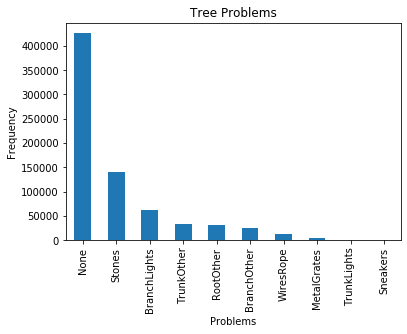

In [85]:
series_problems.value_counts().plot(kind='bar', title='Tree Problems')
plt.xlabel('Problems')
plt.ylabel('Frequency')
plt.show()

The majority of trees do not have any problems, which is understandable since most trees are in good health.

## Does the Number of Problems Increase as the Health of a Tree Decreases?

In [86]:
# count how many problems a tree has
# find the correlation between the number of problems and the health of the tree

# create a new column that states how many problems a tree has

num_of_problems = [] # list of number of tree problems

for x in range(len(problems)):
    if isinstance(problems[x], list) == True: # multiple tree problems are stored in a list
        num_of_problems.append(len(problems[x]))
    if problems[x] == 'None':
        num_of_problems.append(0)
    if (problems[x] != 'None') and (isinstance(problems[x], list) != True): # singluar problem, listed as a string
        num_of_problems.append(1)

In [87]:
# create a new column and set its values equal to the corresponding num_of_problems list

tree['num_problems'] = num_of_problems

In [88]:
# sample new dataset

tree.sample(10)

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude,num_problems
62716,255634,11,OnCurb,Good,Callery pear,None,None,Damage,BranchLights,No,...,No,No,No,Yes,No,No,Staten Island,-74.252104,40.511464,1
339376,544969,2,OnCurb,Fair,pin oak,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.929056,40.704801,0
201145,400792,16,OnCurb,Good,pin oak,None,Helpful,NoDamage,None,No,...,No,No,No,No,No,No,Staten Island,-74.110578,40.561988,0
39959,236538,25,OnCurb,Good,London planetree,1or2,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Brooklyn,-73.900581,40.618235,1
227199,437280,8,OnCurb,Good,purple-leaf plum,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.962847,40.586017,0
118103,324459,19,OnCurb,Fair,London planetree,None,None,NoDamage,BranchLights,No,...,No,No,No,Yes,No,No,Brooklyn,-73.912510,40.607802,1
276774,476387,4,OnCurb,Fair,littleleaf linden,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Manhattan,-73.932484,40.866094,0
423465,642640,4,OnCurb,Good,littleleaf linden,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Queens,-73.790765,40.741780,0
609804,95233,6,OffsetFromCurb,Fair,Norway spruce,1or2,None,NoDamage,None,No,...,No,No,No,No,No,No,Queens,-73.845528,40.717665,0
3427,194843,29,OnCurb,Good,pin oak,1or2,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Queens,-73.870569,40.764685,1


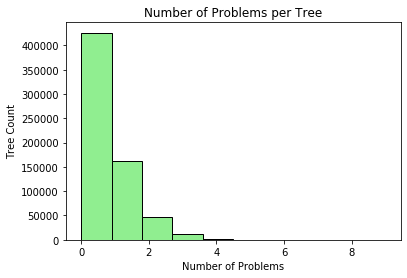

In [89]:
tree.num_problems.plot(kind='hist', color='lightgreen', edgecolor='k') # plot the number of problems a tree has
plt.title('Number of Problems per Tree')
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.show()

In [90]:
tree.num_problems.describe()

count    651829.000000
mean          0.472182
std           0.754570
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: num_problems, dtype: float64

Since the majority of trees have 0 problems, we want to view the statistics of trees with at least one problem.

In [91]:
prob_one_more = tree[tree.num_problems > 0] # filter for trees with at least 1 problem

prob_one_more.num_problems.describe()

count    225783.000000
mean          1.363176
std           0.655124
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: num_problems, dtype: float64

The majority of trees have one problem until around the 75th percentile, which shows 2 problems per tree. The most problematic trees have 9 problems!

### Problems with Good Trees

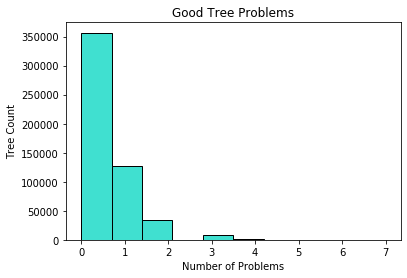

In [92]:
tree[tree.health == 'Good'].num_problems.plot(kind='hist', color='turquoise', edgecolor='k') # number of problems
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.title('Good Tree Problems')
plt.show()

In [93]:
tree[tree.health == 'Good'].num_problems.describe()

count    528582.000000
mean          0.430124
std           0.710651
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: num_problems, dtype: float64

In [94]:
# most common types of good trees

tree[tree.health == 'Good'].spc_common.value_counts().head(20)

London planetree     73295
honeylocust          54488
Callery pear         48044
pin oak              45546
Japanese zelkova     25280
cherry               24497
littleleaf linden    23576
Norway maple         21242
ginkgo               17115
Sophora              15827
red maple            13437
green ash            13219
American linden      10843
silver maple          9454
sweetgum              9080
silver linden         6832
northern red oak      6816
American elm          6409
purple-leaf plum      5441
swamp white oak       5428
Name: spc_common, dtype: int64

### Problems with Fair Trees

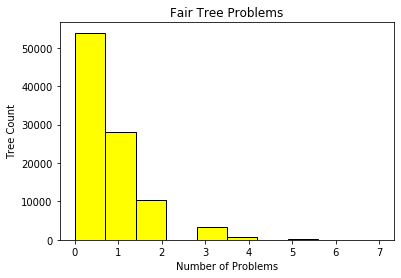

In [95]:
tree[tree.health == 'Fair'].num_problems.plot(kind='hist', color='yellow', edgecolor='k') # number of problems
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.title('Fair Tree Problems')
plt.show()

In [96]:
tree[tree.health == 'Fair'].num_problems.describe()

count    96451.000000
mean         0.643705
std          0.872546
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: num_problems, dtype: float64

In [97]:
# most common types of fair trees

tree[tree.health == 'Fair'].spc_common.value_counts().head(20)

London planetree      11505
Norway maple           9160
Callery pear           8767
honeylocust            8569
pin oak                6387
littleleaf linden      4440
cherry                 3447
Japanese zelkova       3189
red maple              2911
Sophora                2889
ginkgo                 2779
green ash              2598
silver maple           2255
American linden        1944
maple                  1729
northern red oak       1306
American elm           1294
sweetgum               1270
crimson king maple     1136
purple-leaf plum       1090
Name: spc_common, dtype: int64

### Problems with Poor Trees

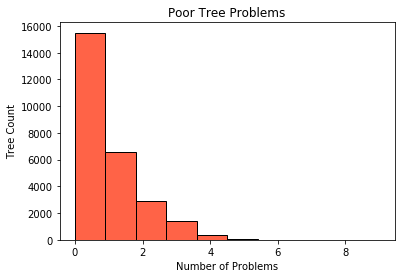

In [98]:
tree[tree.health == 'Poor'].num_problems.plot(kind='hist', color='tomato', edgecolor='k') # number of problems
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.title('Poor Tree Problems')
plt.show()

In [99]:
tree[tree.health == 'Poor'].num_problems.describe()

count    26796.000000
mean         0.684431
std          0.980830
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: num_problems, dtype: float64

In [100]:
# most common types of poor trees

tree[tree.health == 'Poor'].spc_common.value_counts().head(20)

Norway maple          3777
London planetree      2197
Callery pear          2087
littleleaf linden     1717
cherry                1304
pin oak               1234
honeylocust           1189
ginkgo                1118
red maple              896
Japanese zelkova       782
American linden        742
maple                  636
Sophora                616
silver maple           559
crimson king maple     450
green ash              428
purple-leaf plum       342
sweetgum               303
eastern redbud         280
northern red oak       274
Name: spc_common, dtype: int64

## Locating Trees in NYC

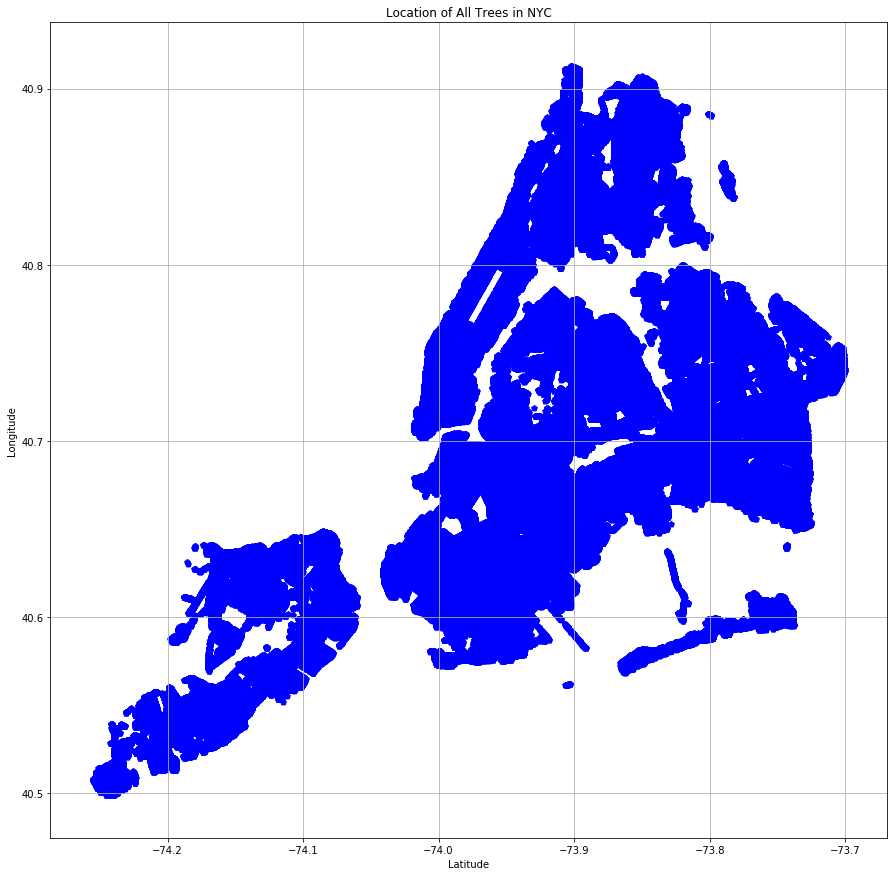

In [101]:
plt.figure(figsize=(15, 15))
plt.scatter(tree.longitude, tree.latitude, c='blue', marker='p')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of All Trees in NYC')
plt.grid()
plt.show()

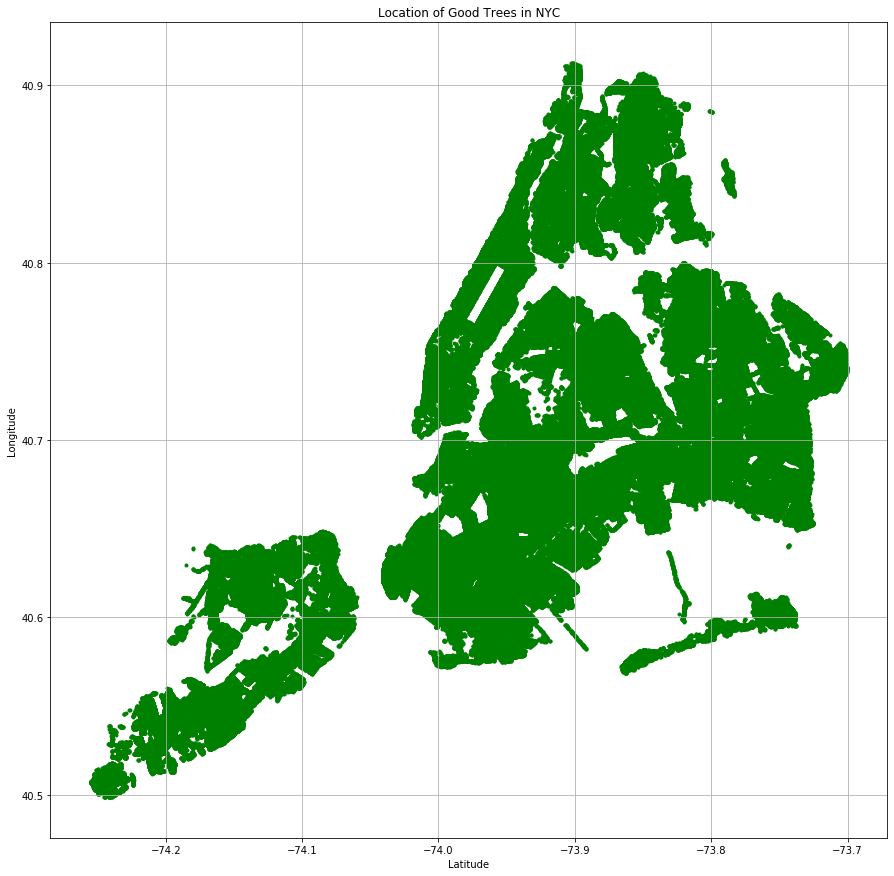

In [102]:
good_trees = tree[tree.health == 'Good']
fair_trees = tree[tree.health == 'Fair']
poor_trees = tree[tree.health == 'Poor']

plt.figure(figsize=(15, 15))
plt.scatter(good_trees.longitude, good_trees.latitude, c='green', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Good Trees in NYC')
plt.grid()
plt.show()

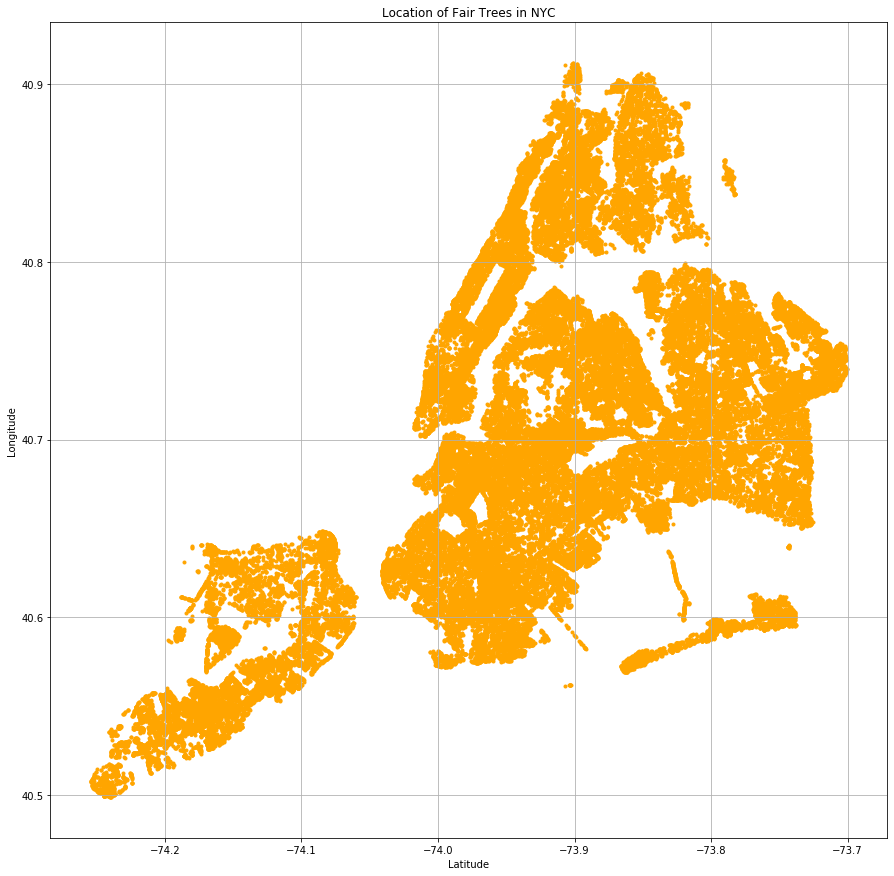

In [103]:
plt.figure(figsize=(15, 15))
plt.scatter(fair_trees.longitude, fair_trees.latitude, c='orange', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Fair Trees in NYC')
plt.grid()
plt.show()

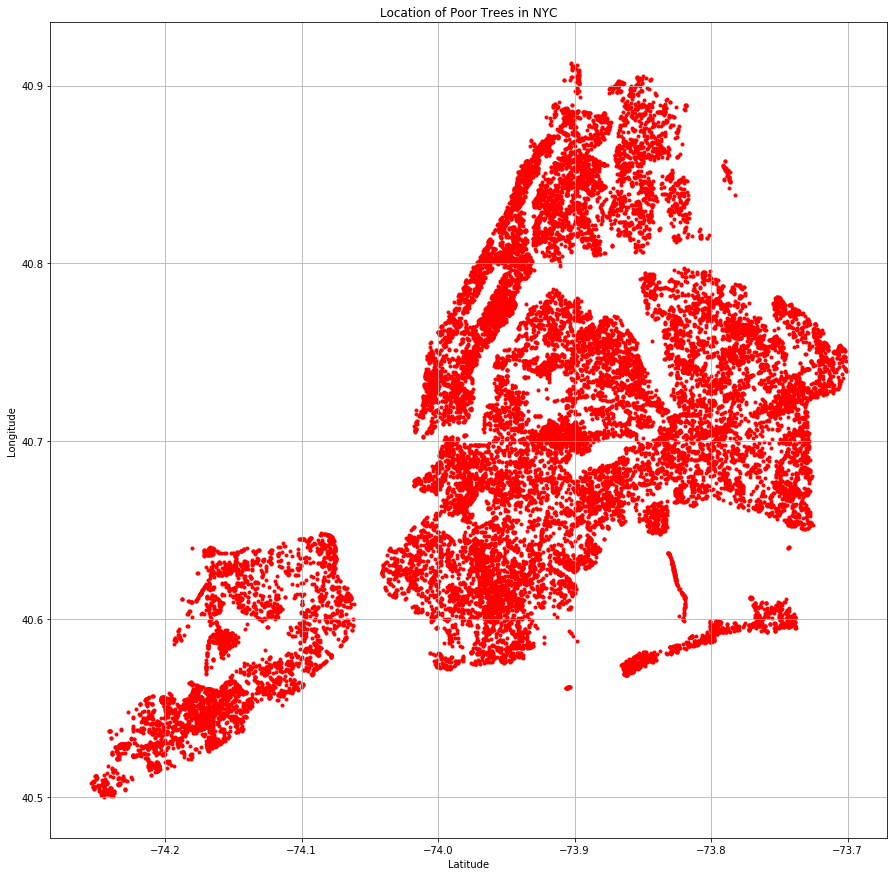

In [104]:
plt.figure(figsize=(15, 15))
plt.scatter(poor_trees.longitude, poor_trees.latitude, c='red', marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Poor Trees in NYC')
plt.grid()
plt.show()

## Do Root Problems Affect the Health of Trees?

There are three types of root problems for trees: 
- root_stone - Indicates the presence of a root problem caused by paving stones in tree bed
- root_grate - Indicates the presence of a root problem caused by metal grates in tree bed
- root_other - Indicates the presence of other root problems	

In [105]:
tree_root_stone = tree.root_stone.value_counts().reset_index()
tree_root_stone.columns = ['Stone', 'Count']
tree_root_stone

,Stone,Count
0,No,511864
1,Yes,139965


In [106]:
tree.groupby('health').root_stone.value_counts()

health  root_stone
Fair    No             72960
        Yes            23491
Good    No            417291
        Yes           111291
Poor    No             21613
        Yes             5183
Name: root_stone, dtype: int64

In [107]:
tree_root_grate = tree.root_grate.value_counts().reset_index()
tree_root_grate.columns = ['Grate', 'Count']
tree_root_grate

,Grate,Count
0,No,648293
1,Yes,3536


In [108]:
tree.groupby('health').root_grate.value_counts()

health  root_grate
Fair    No             95599
        Yes              852
Good    No            526153
        Yes             2429
Poor    No             26541
        Yes              255
Name: root_grate, dtype: int64

In [109]:
tree_root_other = tree.root_other.value_counts().reset_index()
tree_root_other.columns = ['Other', 'Count']
tree_root_other

,Other,Count
0,No,621518
1,Yes,30311


In [110]:
tree.groupby('health').root_other.value_counts()

health  root_other
Fair    No             89964
        Yes             6487
Good    No            506875
        Yes            21707
Poor    No             24679
        Yes             2117
Name: root_other, dtype: int64

## Do Trunk Problems Affect the Health of a Tree?

There are three problems encountered by trees:
- trunk_wire - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunl
- trnk_light - Indicates the presence of a trunk problem caused by lighting installed on the tree
- trnk_other - Indicates the presence of other trunk problems	

In [111]:
tree_trunk_wire = tree.trunk_wire.value_counts().reset_index()
tree_trunk_wire.columns = ['Wire', 'Count']
tree_trunk_wire

,Wire,Count
0,No,638562
1,Yes,13267


In [112]:
tree.groupby('health').trunk_wire.value_counts()

health  trunk_wire
Fair    No             93686
        Yes             2765
Good    No            518832
        Yes             9750
Poor    No             26044
        Yes              752
Name: trunk_wire, dtype: int64

In [113]:
tree_trunk_light = tree.trnk_light.value_counts().reset_index()
tree_trunk_light.columns = ['Light', 'Count']
tree_trunk_light

,Light,Count
0,No,650798
1,Yes,1031


In [114]:
tree.groupby('health').trnk_light.value_counts()

health  trnk_light
Fair    No             96235
        Yes              216
Good    No            527828
        Yes              754
Poor    No             26735
        Yes               61
Name: trnk_light, dtype: int64

In [115]:
tree_trunk_other = tree.trnk_other.value_counts().reset_index()
tree_trunk_other.columns = ['Other', 'Count']
tree_trunk_other

,Other,Count
0,No,619264
1,Yes,32565


In [116]:
tree.groupby('health').trnk_other.value_counts()

health  trnk_other
Fair    No             87075
        Yes             9376
Good    No            509311
        Yes            19271
Poor    No             22878
        Yes             3918
Name: trnk_other, dtype: int64

## Do Branch Problems Affect the Health of a Tree?

There are three possible problems with a tree's branches:
- brch_light - Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches
- brch_shoe - Indicates the presence of a branch problem caused by sneakers in the branches
- brch_other - Indicates the presence of other branch problems	

In [117]:
tree_branch_light = tree.brch_light.value_counts().reset_index()
tree_branch_light.columns = ['Light', 'Count']
tree_branch_light

,Light,Count
0,No,589478
1,Yes,62351


In [118]:
tree.groupby('health').brch_light.value_counts()

health  brch_light
Fair    No             85530
        Yes            10921
Good    No            479521
        Yes            49061
Poor    No             24427
        Yes             2369
Name: brch_light, dtype: int64

In [119]:
tree_branch_shoe = tree.brch_shoe.value_counts().reset_index()
tree_branch_shoe.columns = ['Shoes', 'Count']
tree_branch_shoe

,Shoes,Count
0,No,651420
1,Yes,409


In [120]:
tree.groupby('health').brch_shoe.value_counts()

health  brch_shoe
Fair    No            96357
        Yes              94
Good    No           528297
        Yes             285
Poor    No            26766
        Yes              30
Name: brch_shoe, dtype: int64

In [121]:
tree_branch_other = tree.brch_other.value_counts().reset_index()
tree_branch_other.columns = ['Other', 'Count']
tree_branch_other

,Other,Count
0,No,627482
1,Yes,24347


In [122]:
tree.groupby('health').brch_other.value_counts()

health  brch_other
Fair    No             88567
        Yes             7884
Good    No            515774
        Yes            12808
Poor    No             23141
        Yes             3655
Name: brch_other, dtype: int64

Let's isolate the columns problems to borough to see if there are any patterns.

In [123]:
tree_probs_spec = tree[['problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_probs_spec.sample(10)

,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
281705,None,No,No,No,No,No,No,No,No,No
194061,None,No,No,No,No,No,No,No,No,No
127591,BranchLights,No,No,No,No,No,No,Yes,No,No
618769,Stones,Yes,No,No,No,No,No,No,No,No
509971,None,No,No,No,No,No,No,No,No,No
449277,BranchLights,No,No,No,No,No,No,Yes,No,No
627291,RootOther,No,No,Yes,No,No,No,No,No,No
141016,"Stones,BranchLights",Yes,No,No,No,No,No,Yes,No,No
583317,None,No,No,No,No,No,No,No,No,No
194083,None,No,No,No,No,No,No,No,No,No


The columns root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, and brch_other indicate all the problems listed under the problems column. For example, if a tree (46803) has 'RootOther,WiresRope,TrunkLights' listed under problems, then the columns root_other, trunk_wire, and trnk_light show a Yes while the others show No.